[[ 3.38061714  3.17622384  3.66136927 ...,  2.53997325  4.0739911
   2.81833998]
 [ 3.37829131  3.40154034  2.93918408 ...,  1.85014781  3.72988272
   2.31977588]
 [ 4.11970299  3.6303717   3.60802557 ...,  2.8466503   5.15867069
   3.36552756]
 ..., 
 [ 2.55819917  3.33668269  2.838725   ...,  3.13616294  4.17742881
   3.65190513]
 [ 3.55458384  4.67025133  3.96763204 ...,  2.62893871  5.05278195
   3.71420456]
 [ 3.53650801  3.53987985  3.63056242 ...,  2.68811489  4.48540382
   3.02732305]]


Text(0.5,1,'SGD')

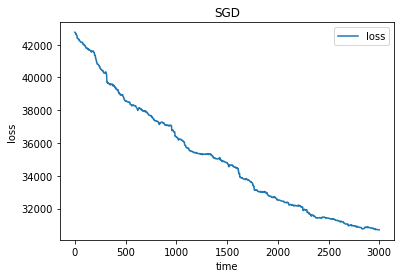

In [34]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

def matrix_factorization(R,Rv, P, Q, K, steps=3000, alpha=0.02, beta=0.01):
    Q = Q.T
    for step in range(steps):
        i=random.sample(range(len(R)),1)[0]
        j=random.sample(range(len(R[i])),1)[0]
        while(R[i][j]==0):
            i=random.sample(range(len(R)),1)[0]
            j=random.sample(range(len(R[i])),1)[0]
        if R[i][j] > 0:
            eij = R[i][j] - np.dot(P[i,:],Q[:,j])
            for k in range(K):
                P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(Rv)):
            for j in range(len(Rv[i])):
                if Rv[i][j] > 0:
                    e = e + pow(Rv[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        L.append(e)
#         if(step%10==0):
#             print(step,':',e)
    return P, Q.T,



R=np.zeros([943,1682])
Rv=np.zeros([943,1682])
with open('ml-100k/u1.base') as f:
    for k in range(80000):
        a=f.readline()
        i=int(a.split('\t',3)[0])
        j=int(a.split('\t',3)[1])
        m=int(a.split('\t',3)[2])
        R[i-1][j-1]=m
        
with open('ml-100k/u1.test') as f:
    for k in range(20000):
        a=f.readline()
        i=int(a.split('\t',3)[0])
        j=int(a.split('\t',3)[1])
        m=int(a.split('\t',3)[2])
        Rv[i-1][j-1]=m
        
N = len(R)
M = len(R[0])
K = 15
L=[]

P = np.random.rand(N,K)
Q = np.random.rand(M,K)

nP, nQ = matrix_factorization(R,Rv, P, Q, K)
nR = np.dot(nP, nQ.T)
print(nR)

n = np.arange(len(L))

plt.plot(n,L,label='loss')

plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('loss')
plt.title('SGD')